# Import packages

In [25]:
# Import packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
import keras.backend as K
import tensorflow as tf
import keras

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from pandas import DataFrame
from pandas_datareader import data as wb
from matplotlib import pyplot

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

%matplotlib inline

# Set figure parameters
plt.rcParams['figure.figsize'] = [10, 7.5]

# Input data

[*********************100%%**********************]  1 of 1 completed


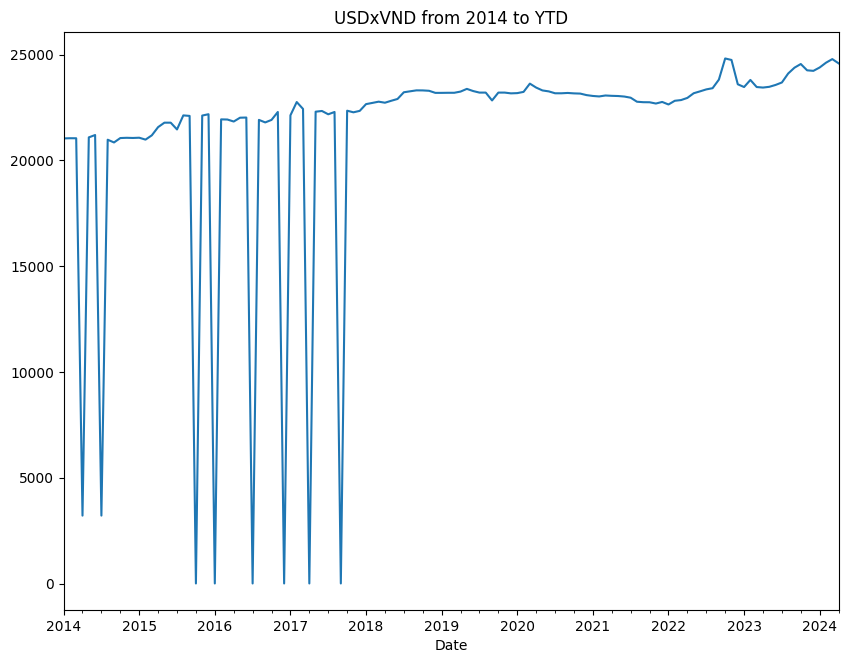

Total data: 10 years


In [13]:
yf.pdr_override()

data = wb.get_data_yahoo('VND=x', start = '2014-01-01', end = '2024-12-31', interval = '1mo')

# Plot
data['Adj Close'].plot()
plt.title("USDxVND from 2014 to YTD")
plt.show()

# Summary statistics
df = pd.DataFrame(data['Adj Close']) 

diff = df.index.values[-1] - df.index.values[0]
months = diff.astype('timedelta64[M]')
years = int(months/12)
print("Total data: %d years" %years)

# Processing data

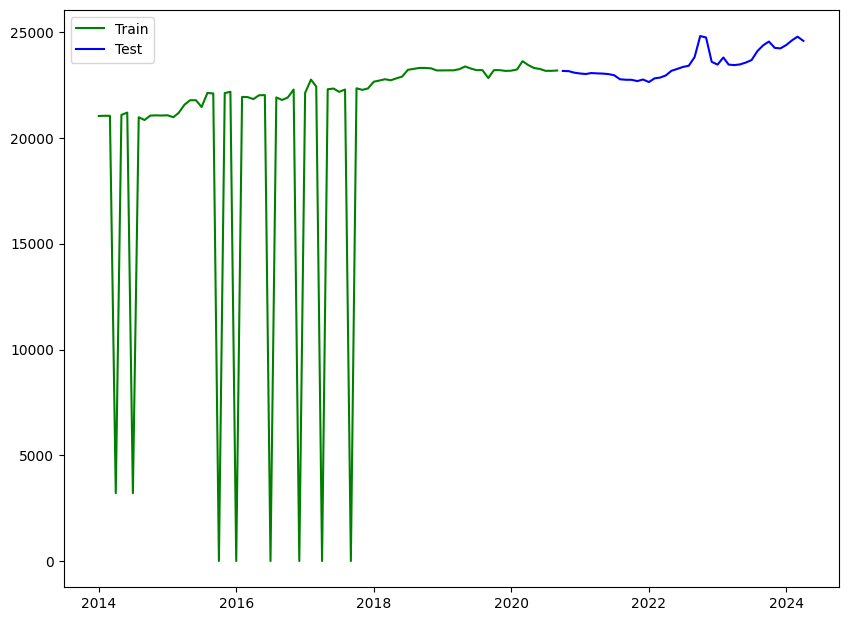

In [14]:
# Seperate into train and test data
to_row = int(len(df)*0.66)

df_train = pd.DataFrame(df[0:to_row]['Adj Close'])
df_test = pd.DataFrame(df[to_row:]['Adj Close'])

# Plot
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Test')
plt.legend()
plt.show()

In [15]:
# Data normalisation - rescale data to make mean of observed values 0 

sc = StandardScaler()
train_sc = sc.fit_transform(df_train)
test_sc = sc.fit_transform(df_test)

In [16]:
# Further segregate train and test data

x_train = train_sc[:-1]
y_train = train_sc[1:]

x_test = test_sc[:-1]
y_test = test_sc[1:]

# Modelling ANN

In [26]:
# Create sequential model
K.clear_session()
n_features = x_train.shape[1]
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(1,1)))
model.add(Dense(n_features))
model.summary()

AttributeError: module 'keras.src.backend' has no attribute 'Variable'

In [21]:
# Compile and fit the model

model.compile(loss=tf.keras.metrics.mean_squared_error, metrics = [tf.keras.RootMeanSquaredError(name='rmse')], optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'loss', patience = 2, verbose = 1)
history = model.fit(x_train, y_train, epochs = 200, batch_size = 1, verbose = 1, callbacks = [early_stop], shuffle = False)
                                                                                            

NameError: name 'tf' is not defined